In [177]:
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import typing
import os

%matplotlib notebook

In [178]:
import numpy as np

# переводим файлик в pandas dataframe

In [179]:
def file_to_pd(file_path:str)-> pd.DataFrame:
    lst = []
    lst2 = []
    with open(file_path) as f:
        for line in f:
            if 'Потом айтензор' in line:
                break
            lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))
        for line in f:
            lst2.append(dict(zip(['n1','n2','Re','Im'], 
                                 list(map(float,re.findall(r'[\d\.e-]+', line)))+[0])))

    df1 = pd.DataFrame(lst[1:])
    df2 = pd.DataFrame(lst2)
    df2 = df2[df2.n1 == df2.n2]
    df2.n1 += 1
    df2.n2 += 1
    df = pd.concat([df1, df2], axis = 0)
    df.sort_values(by = ['n1','n2'], inplace = True)
    df.reset_index(inplace = True, drop =True)
    
    return df


In [35]:
files_list = sorted(list(i for i in os.listdir(os.getcwd()) if '.txt' in i))
files_list

['W3_40_10_3_periodic_superconductive.txt',
 'W3_40_10_3superconductive.txt',
 'W3_40_10_5_periodic_superconductive.txt',
 'W3_40_10_5superconductive.txt',
 'W3_40_15_3_periodic_superconductive.txt',
 'W3_40_15_3superconductive.txt',
 'W3_40_15_5_periodic_superconductive.txt',
 'W3_40_15_5superconductive.txt',
 'W3_40_5_3_periodic_superconductive.txt',
 'W3_40_5_3superconductive.txt',
 'W3_40_5_5_periodic_superconductive.txt',
 'W3_40_5_5superconductive.txt',
 'W4_40_15_5_periodic_superconductive.txt',
 'W4_40_15_5_superconductive.txt',
 'W5_40_15_5_superconductive.txt']

# Как нарисовать корреляции (без Фурье)

In [36]:
# читаем файл

df = file_to_pd(files_list[4])

# Нумерация узлов на решетке такая:
'''
1	5	9	...
2	6	10	...
3	7	11	...
4	8	12	...
'''
''

''

In [37]:
df[(df.n1 == 100) & (df.n2 == 105)]

,n1,n2,Re,Im
7034,100.0,105.0,0.01366,0.0


### Тогда полученные корреляции "Вдоль ноги" номер 2 из центра это узел 82 (для W = 4)

In [7]:
lst = df[(df.n1 == 82) & df.n2.isin(range(82,161,4))].Re.to_list()

0.8625766730000947


<IPython.core.display.Javascript object>


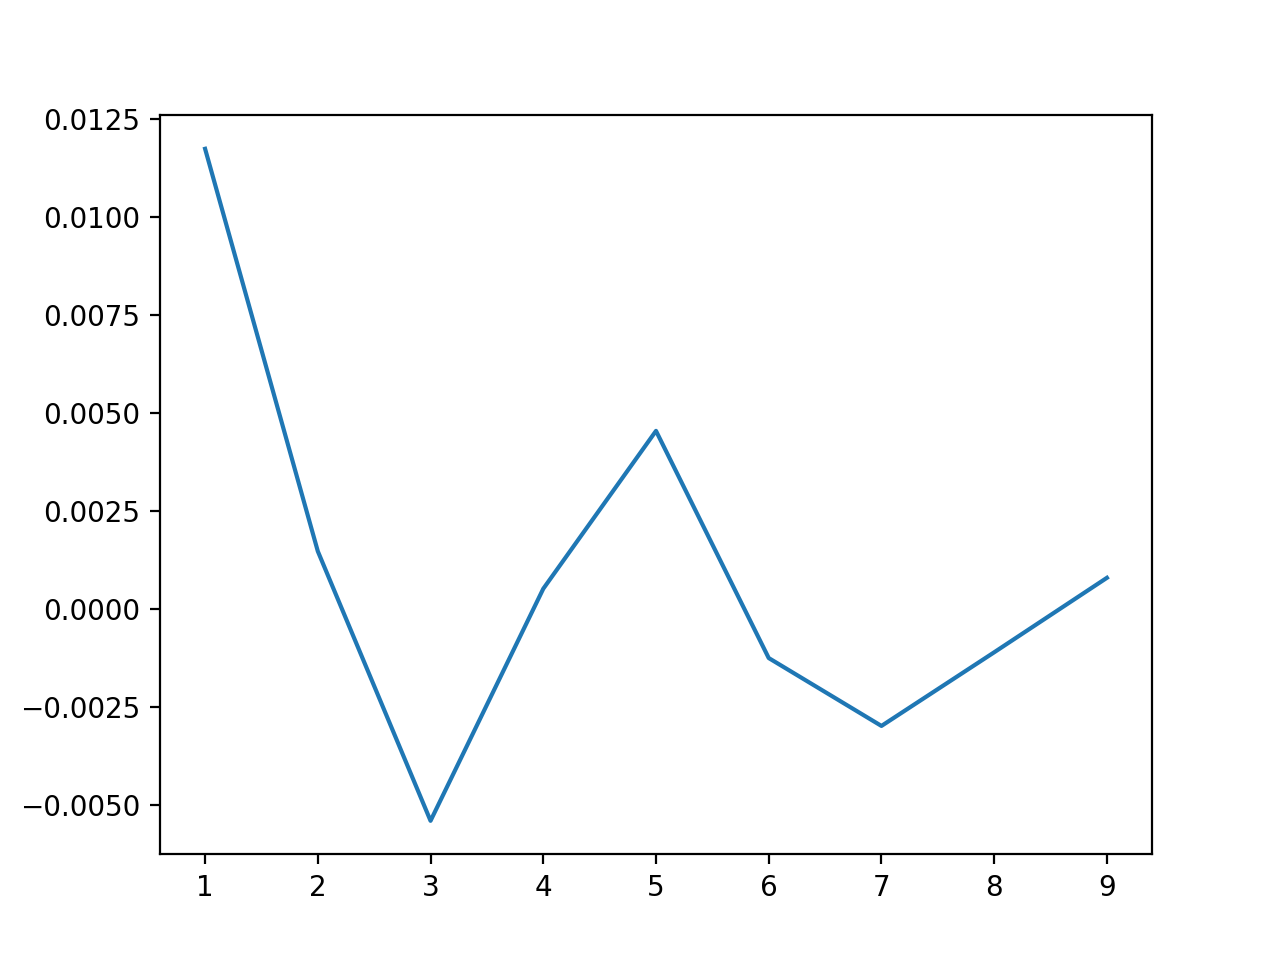

In [8]:
# Здесь взял от узла номер 1, потому что корреляция узла самого с собой около 0.8-0.9 и за ней мало что видно
print(lst[0])
plt.plot(list(range(len(lst)))[1:], lst[1:])

In [9]:
df[(df.n1 == 82) | (df.n2 == 82)]

,n1,n2,Re,Im
81,1.0,82.0,0.000169,0.0
200,2.0,82.0,0.000169,0.0
318,3.0,82.0,0.000169,0.0
435,4.0,82.0,0.000252,0.0
551,5.0,82.0,0.000252,0.0
...,...,...,...,...
6514,82.0,116.0,0.001020,0.0
6515,82.0,117.0,0.001020,0.0
6516,82.0,118.0,0.000804,0.0
6517,82.0,119.0,0.000804,0.0


In [10]:
plt.plot(df[(df.n2 == 82) & (df.n1.isin(range(2,82,4)))].Re[:].tolist())

In [11]:
df

,n1,n2,Re,Im
0,1.0,1.0,0.930481,0.0
1,1.0,2.0,0.000768,0.0
2,1.0,3.0,0.000768,0.0
3,1.0,4.0,0.001614,0.0
4,1.0,5.0,0.001614,0.0
...,...,...,...,...
7255,118.0,119.0,0.000766,0.0
7256,118.0,120.0,0.000766,0.0
7257,119.0,119.0,0.930485,0.0
7258,119.0,120.0,0.000766,0.0


# Функция от Tiancheng

(он написал "расчет структурного фактора")

In [12]:
import numpy as np

'''
dx	dy	<Delta⁺_j Delta_i>  --  s-wave
0	0	0.43536001696060 + I * 0.00000000000000
0	1	0.18038227330943 + I * -0.00000000000000
0	2	0.10985737618875 + I * -0.00000000000000
0	3	0.18038227330943 + I * 0.00000000000000
1	0	0.18038227330943 + I * -0.00000000000000
1	1	0.10985737618875 + I * -0.00000000000000
1	2	0.11909652058616 + I * -0.00000000000000
1	3	0.10985737618875 + I * 0.00000000000000
2	0	0.10985737618875 + I * -0.00000000000000
2	1	0.11909652058616 + I * -0.00000000000000
2	2	0.10341090148926 + I * -0.00000000000000
2	3	0.11909652058616 + I * 0.00000000000000
3	0	0.18038227330943 + I * 0.00000000000000
3	1	0.10985737618875 + I * -0.00000000000000
3	2	0.11909652058616 + I * 0.00000000000000
3	3	0.10985737618875 + I * 0.00000000000000
'''

# data = read_corr(file_out, str_to_find) # read the datafile like above
# print(data)
rxs = data[:, 0]
rys = data[:, 1]
corrs = data[:, 2]

lx = 40
ly = 4
pi = np.pi
exp = np.exp
kxarray = np.arange(0, 2 * pi + 0.0001, 2 * pi / lx)
kyarray = np.arange(0, 2 * pi + 0.0001, 2 * pi / ly)

# Sxys = np.full((len(kxarray), len(kyarray)), np.nan)

# for i_kx, kx in enumerate(kxarray):
#     for i_ky, ky in enumerate(kyarray):
#         Sxy = 0
#         for r, corr in enumerate(corrs):
#             rx = rxs[r]
#             ry = rys[r]
#             Sxy = Sxy + corr * exp(1j * (rx * kx + ry * ky))

#         Sxys[i_kx, i_ky, i_sz] = Sxy

NameError: name 'data' is not defined

In [13]:
len(kxarray)

NameError: name 'kxarray' is not defined

In [14]:
df = file_to_pd('W5_40_15_5_superconductive.txt')

In [15]:
df[(df.n1 == 100) & (df.n2 == 101)]

,n1,n2,Re,Im
14950,100.0,101.0,-0.001917,0.0


In [160]:
W, L = 5, 40
ctr = W * (L//2) - W//2

df = file_to_pd(f'W{W}_{L}_15_5_superconductive.txt')
df[(df.n1 == ctr) & (df.n2 == ctr + W)]

,n1,n2,Re,Im
14749,98.0,103.0,0.026357,0.0


In [62]:
def get_all_correlations(data, site_num):
    d = data[(data.n2 == site_num)&(data.n2!=data.n1)].copy()
    d['n1'], d['n2'] = d['n2'], d['n1']
    return pd.concat([data[data.n1 == site_num],
                      d], axis = 0)

In [182]:
W * (L//2 - 1), W //2

(95, 2)

In [183]:
W * (L//2) - W//2

98

In [83]:
dd = get_all_correlations(df, 98).sort_values(by = 'n2')

<IPython.core.display.Javascript object>


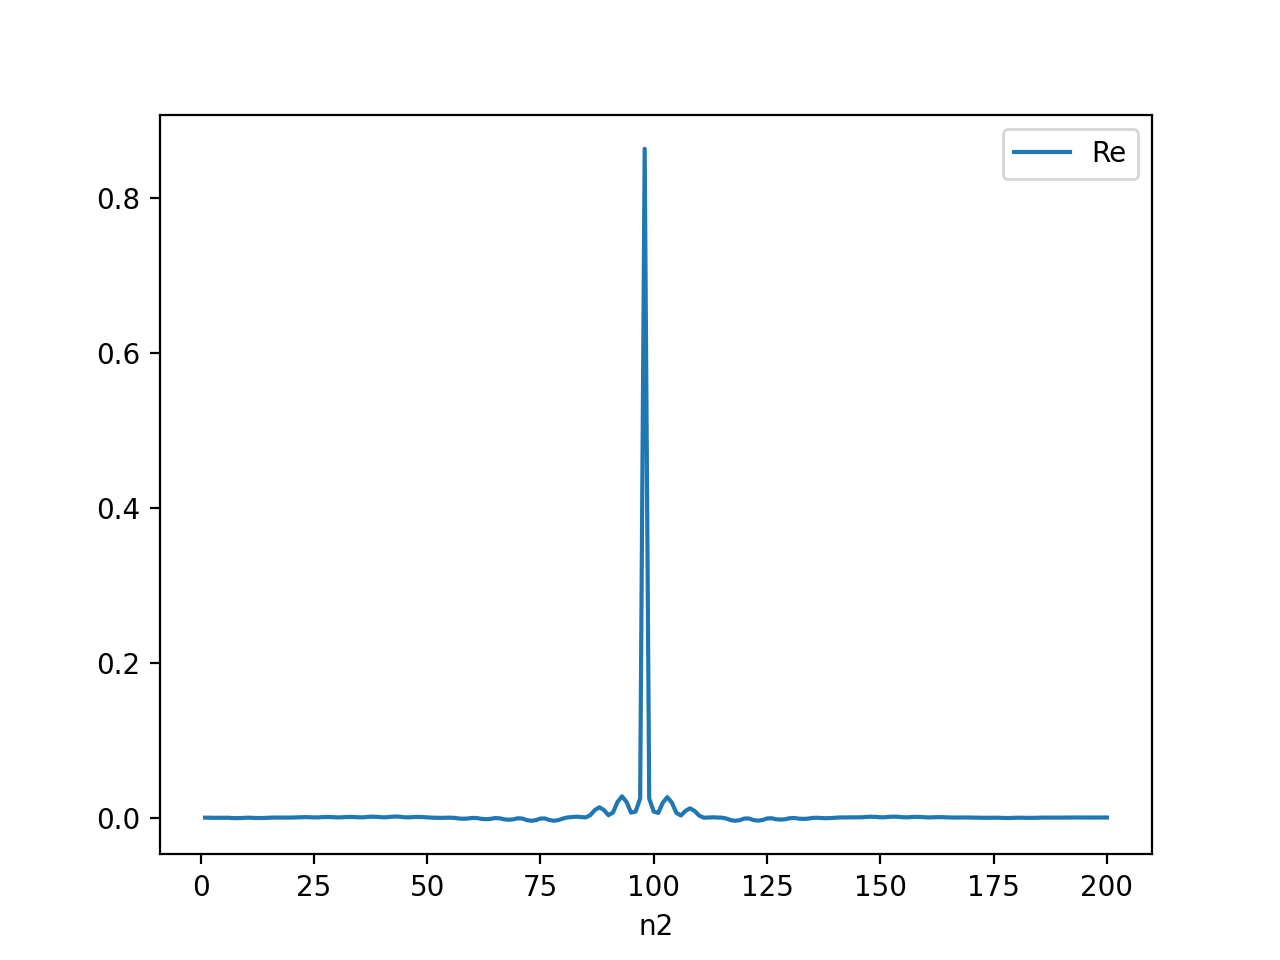

<AxesSubplot:xlabel='n2'>

In [86]:
dd[['n2','Re']].plot(x = 'n2', y= 'Re')

In [204]:
def get(df, n1, n2):
    return df[(df.n1 == n1) & (df.n2 == n2)].Re.values

In [294]:
corr = [get(df, ctr, ctr + i_x*W) for i_x in range(L//2+1)]

<IPython.core.display.Javascript object>


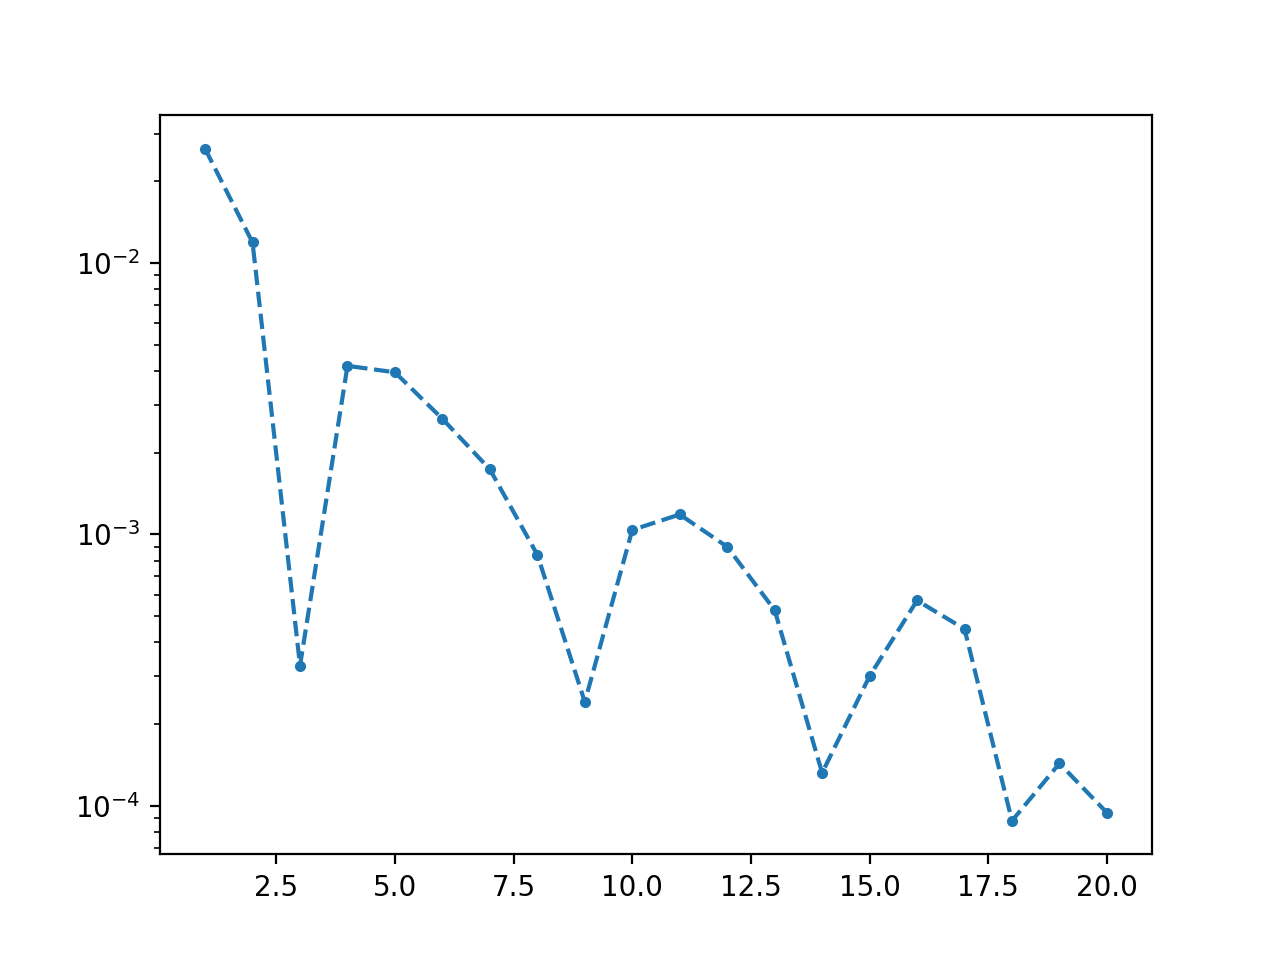

In [299]:
%matplotlib notebook
from numpy import log
plt.plot([i+1 for i in range(len(corr)-1)],
         np.abs(corr).ravel()[1:], '.--')
# plt.xscale('log')
plt.yscale('log')


In [293]:
def fourier(df, x0, get=get):
    s = {n_kx:0 for n_kx in range(-L//2 + 1, L//2+1)}
    
    for n_kx in s:
        for i_x in range(L//2):
            kx = 2*np.pi * n_kx / L
            phase = kx * i_x
            term = get(df, x0, x0 + i_x*W) * np.cos(phase) / L
            s[n_kx] += term
    return s

In [161]:
def fourier_2d(df, x0, get=get):
    s = {(n_kx, n_ky) :0 
         for n_kx in range(-L//2 + 1, L//2+1) 
         for n_ky in range(-W//2+1, W//2+1)}
    
    for n_kx, n_ky in s:
        for i_x in range(L//2):
            for i_y in range(W//2+1): # Тут +1 чтобы было три элемента (для нечетных нужен +1)
                kx = 2*np.pi * n_kx / L
                ky = 2*np.pi * n_ky / W

                phase = kx * i_x + ky * i_y

                term = get(df, x0, x0 + i_x*W+ i_y) * np.cos(phase)  # Тут сдвигаем на i_y т.к. счет вдоль Oy
                s[(n_kx, n_ky)] += term
    return s

# 2D fourier

In [301]:
ss = fourier_2d(df, ctr)

In [302]:
kx1 = [2*np.pi * i[0] / L for i in ss if (i[0] >= 0 and i[1] >= 0)]
ky1 = [2*np.pi * i[1] / W for i in ss if (i[0] >= 0 and i[1] >= 0)]
skxy = [ss[(i[0], i[1])] for i in ss if (i[0] >= 0 and i[1] >= 0)]

In [303]:
len(kx1), len(ky1), len(skxy)

(63, 63, 63)

<IPython.core.display.Javascript object>


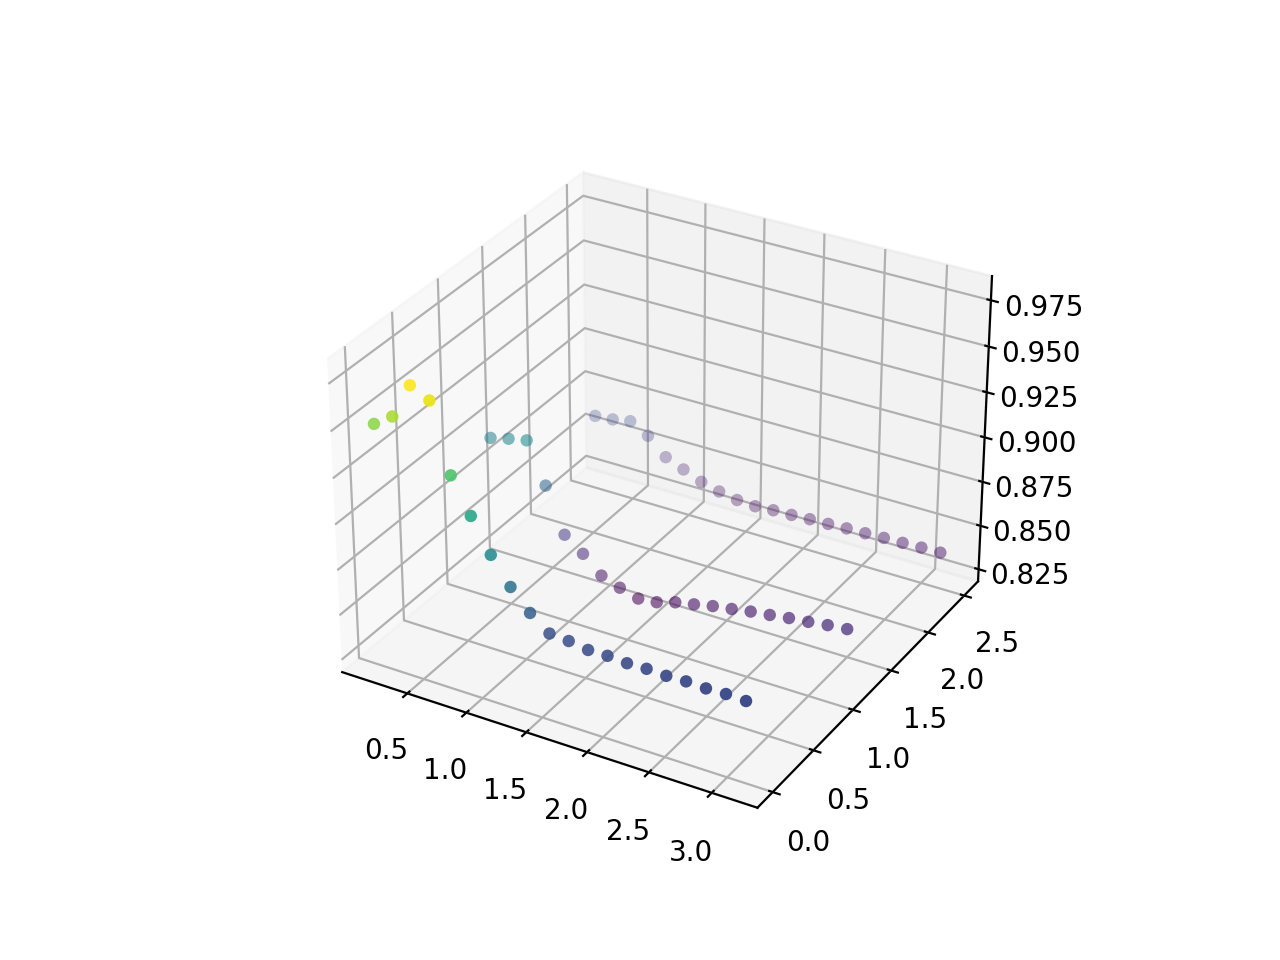

In [304]:
%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter(kx1[3:], ky1[3:], skxy[3:], c = skxy[3:], cmap='viridis', edgecolor='none', linewidth=0.5);


# 1D fourier

In [202]:
s = fourier(df, ctr)

In [203]:
kx = [2*np.pi * n_kx / L for n_kx in s if n_kx >=0]
skx = [s[n_kx] for n_kx in s if n_kx >= 0]

<IPython.core.display.Javascript object>


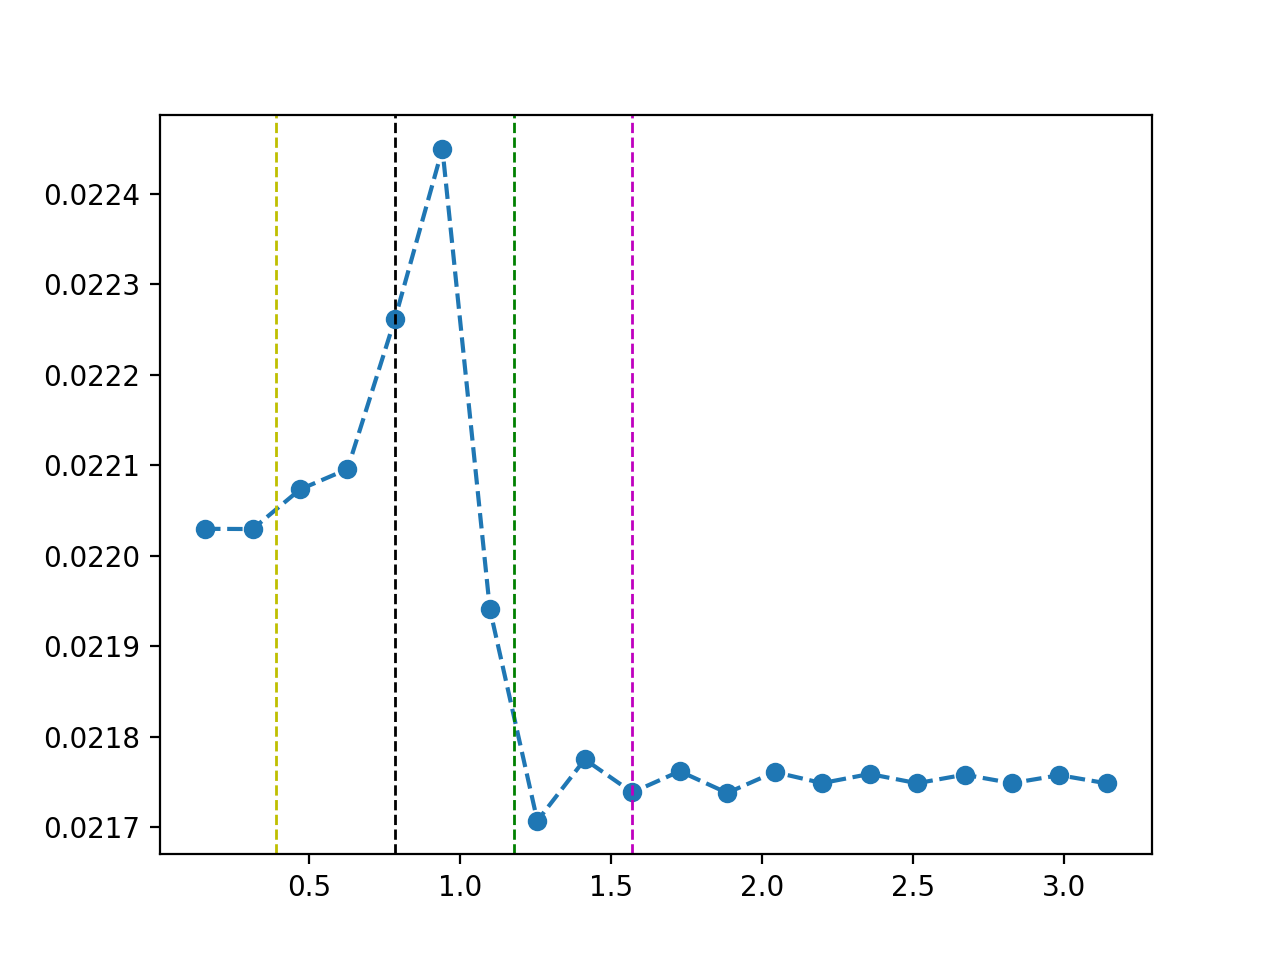

In [287]:
%matplotlib notebook

import matplotlib.pyplot as plt
plt.plot(kx[1:], skx[1:], 'o--')

Nup, Ndown = 15, 5
plt.axvline(np.pi * (Nup)/L, ls='--', c='g', lw=1)
plt.axvline(np.pi * (Ndown)/L, ls='--', c='y', lw=1)
plt.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1)

In [72]:
np.pi *Nup / L, np.pi *Ndown / L, np.pi * (Nup - Ndown) / L

(1.1780972450961724, 0.39269908169872414, 0.7853981633974483)

In [73]:
s1 = fourier(df, ctr-1)
kx = [2*np.pi * n_kx / L for n_kx in s1 if n_kx >=0]
skx = [s[n_kx] for n_kx in s1 if n_kx >= 0]

In [89]:
len(', эпизод')

8

# W5, Nup = 19, Ndown = 1, на поляронной линии

In [275]:
df19_1 = file_to_pd('W5_40_19_1_superconductive.txt')
W, L = 5, 40
ctr = W * (L//2) - W//2


## Нарисуем сами корреляции

<IPython.core.display.Javascript object>


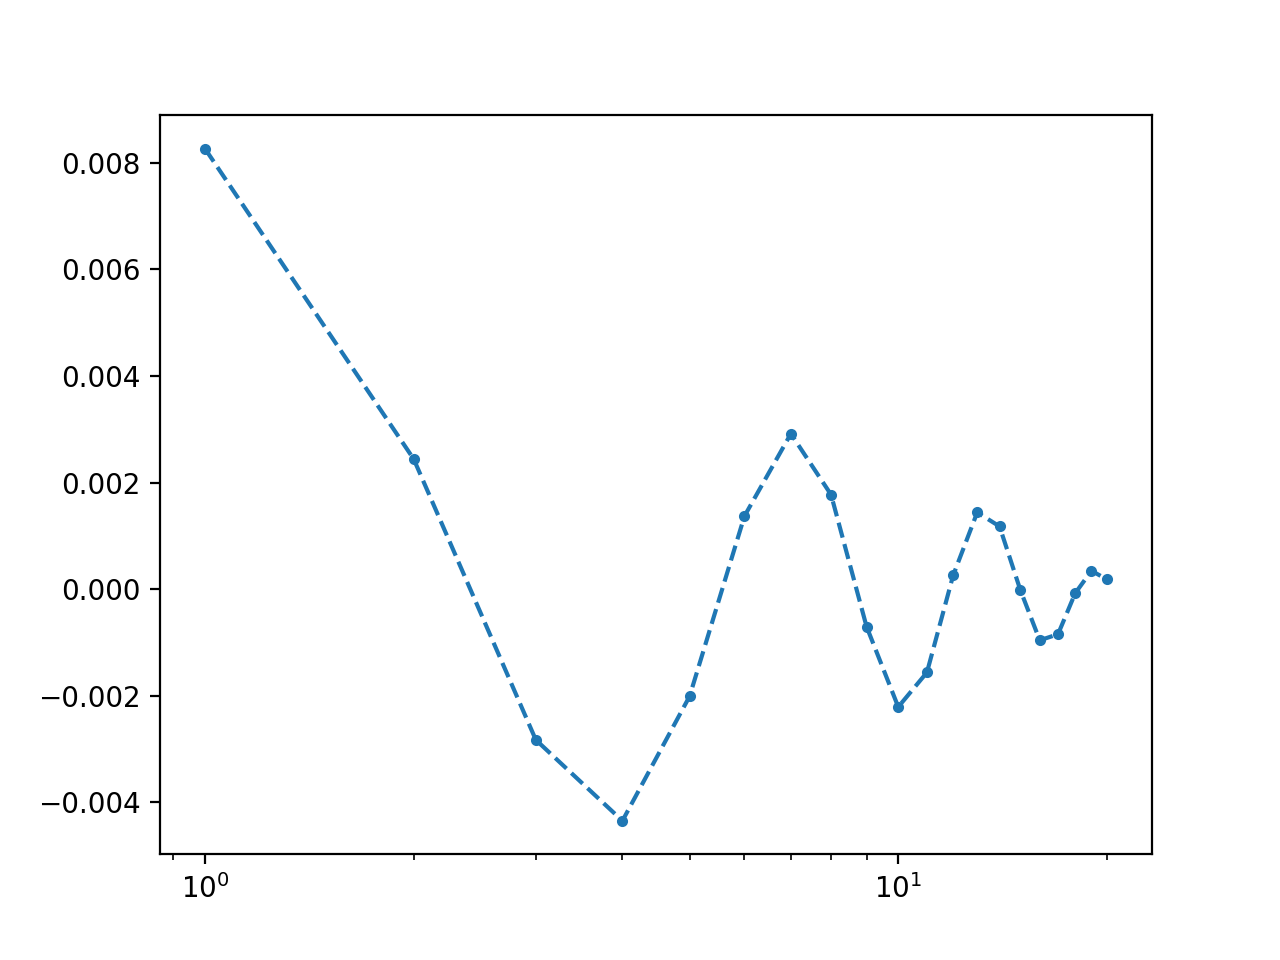

In [284]:
corr = [get(df19_1, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
%matplotlib notebook
plt.plot([i+1 for i in range(len(corr)-1)],
         np.array(corr).ravel()[1:], '.--')
plt.xscale('log')
# plt.yscale('log')

In [277]:
corr = [get(df19_1, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
s = fourier(df19_1, ctr)
kx = [2*np.pi * n_kx / L for n_kx in s if n_kx >=0]
skx = [s[n_kx] for n_kx in s if n_kx >= 0]


<IPython.core.display.Javascript object>


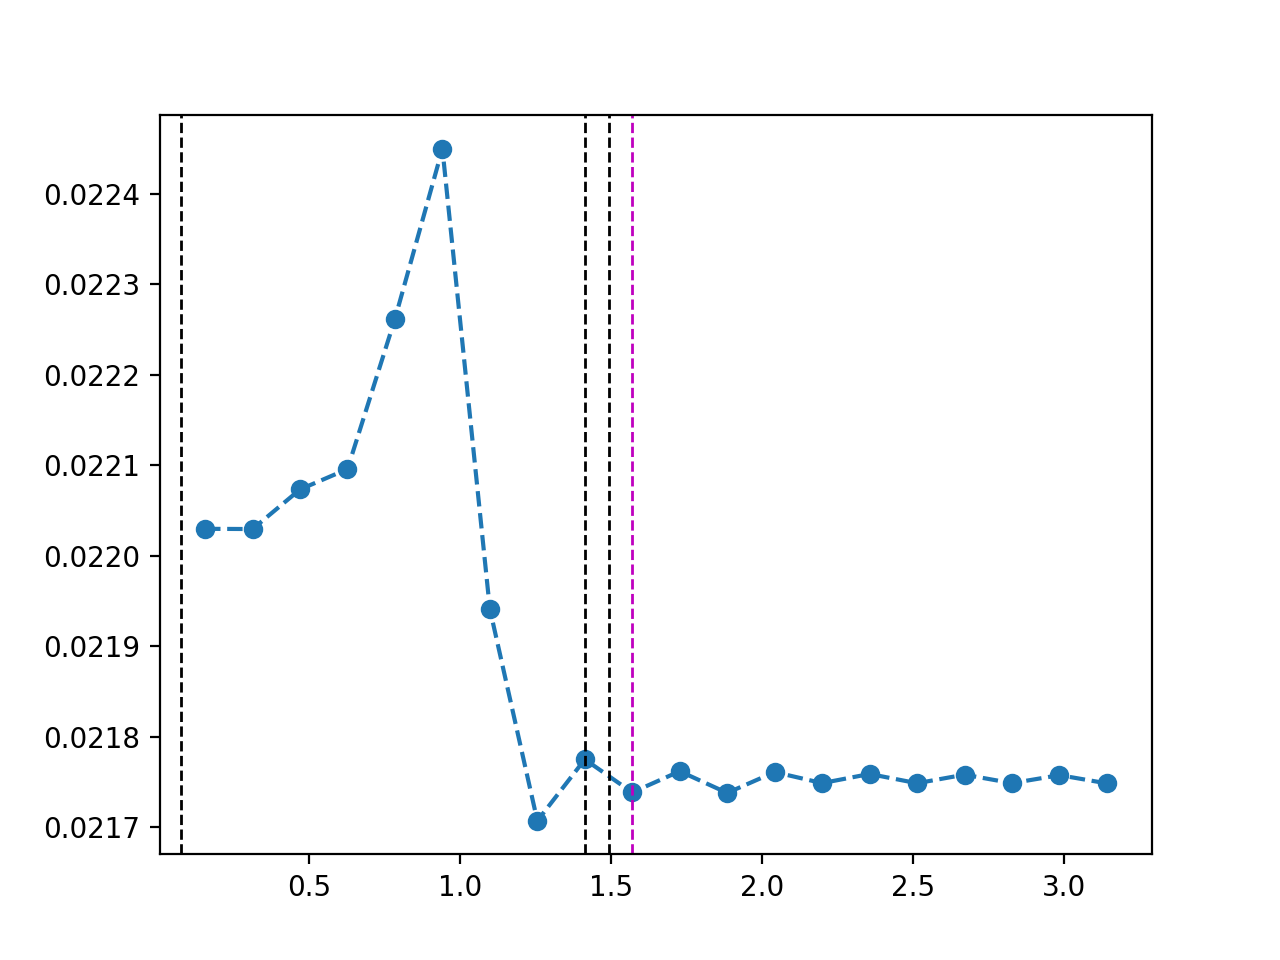

In [279]:
%matplotlib notebook

import matplotlib.pyplot as plt
plt.plot(kx[1:], skx[1:], 'o--')

Nup, Ndown = 19, 1
plt.axvline(np.pi * (Nup)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Ndown)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1)

<IPython.core.display.Javascript object>


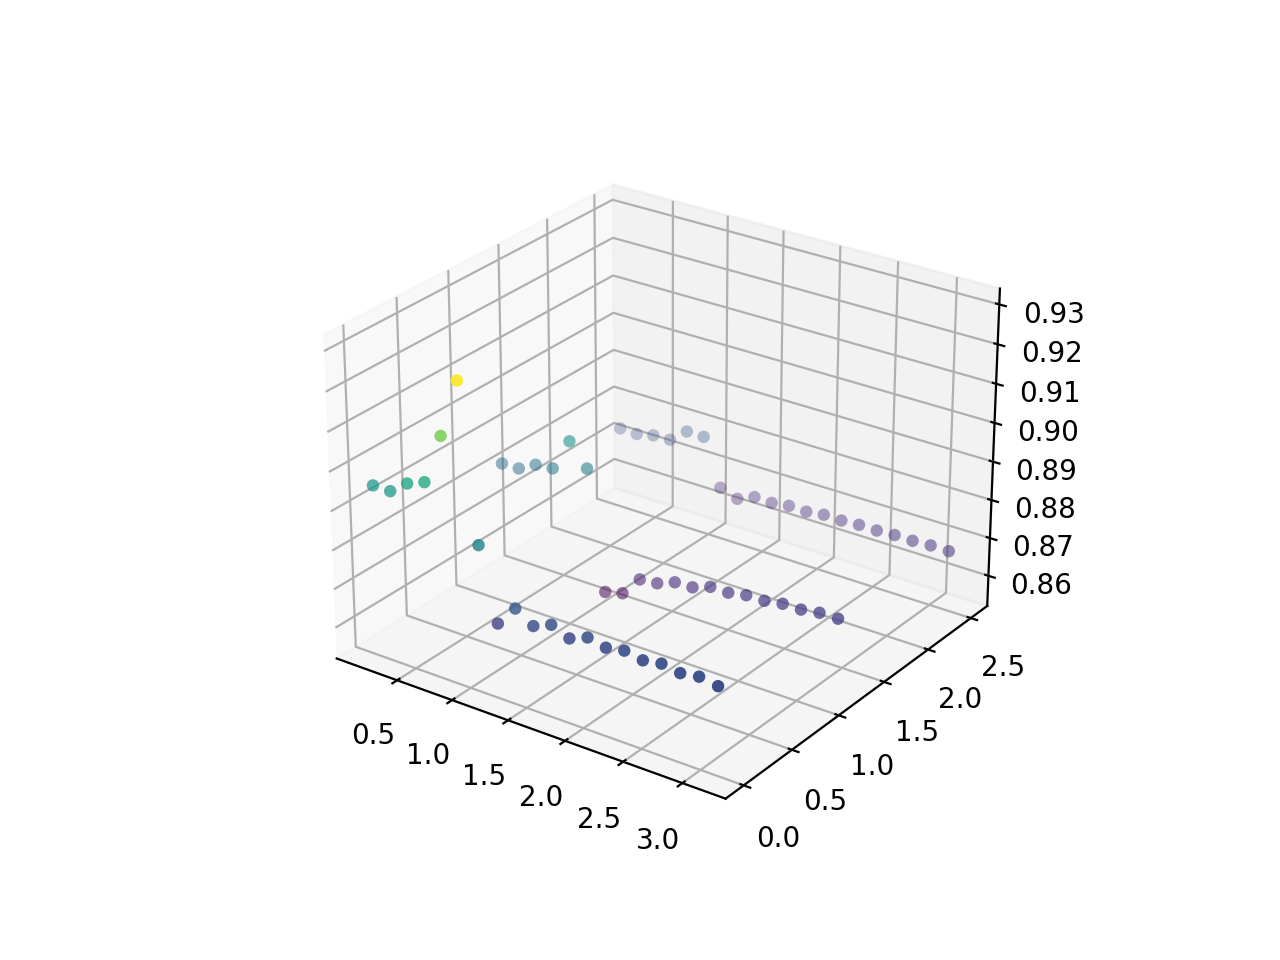

In [243]:
ss = fourier_2d(df19_1, ctr)
kx1 = [2*np.pi * i[0] / L for i in ss if (i[0] >= 0 and i[1] >= 0)]
ky1 = [2*np.pi * i[1] / W for i in ss if (i[0] >= 0 and i[1] >= 0)]
skxy = [ss[(i[0], i[1])] for i in ss if (i[0] >= 0 and i[1] >= 0)]

%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter(kx1[3:], ky1[3:], skxy[3:], c = skxy[3:], cmap='viridis', edgecolor='none', linewidth=0.5);

# W5 Nup = 10, Ndown = 10, BCS

In [239]:
df10_10 = file_to_pd('W5_40_10_10_superconductive.txt')
W, L = 5, 40
ctr = W * (L//2) - W//2

<IPython.core.display.Javascript object>


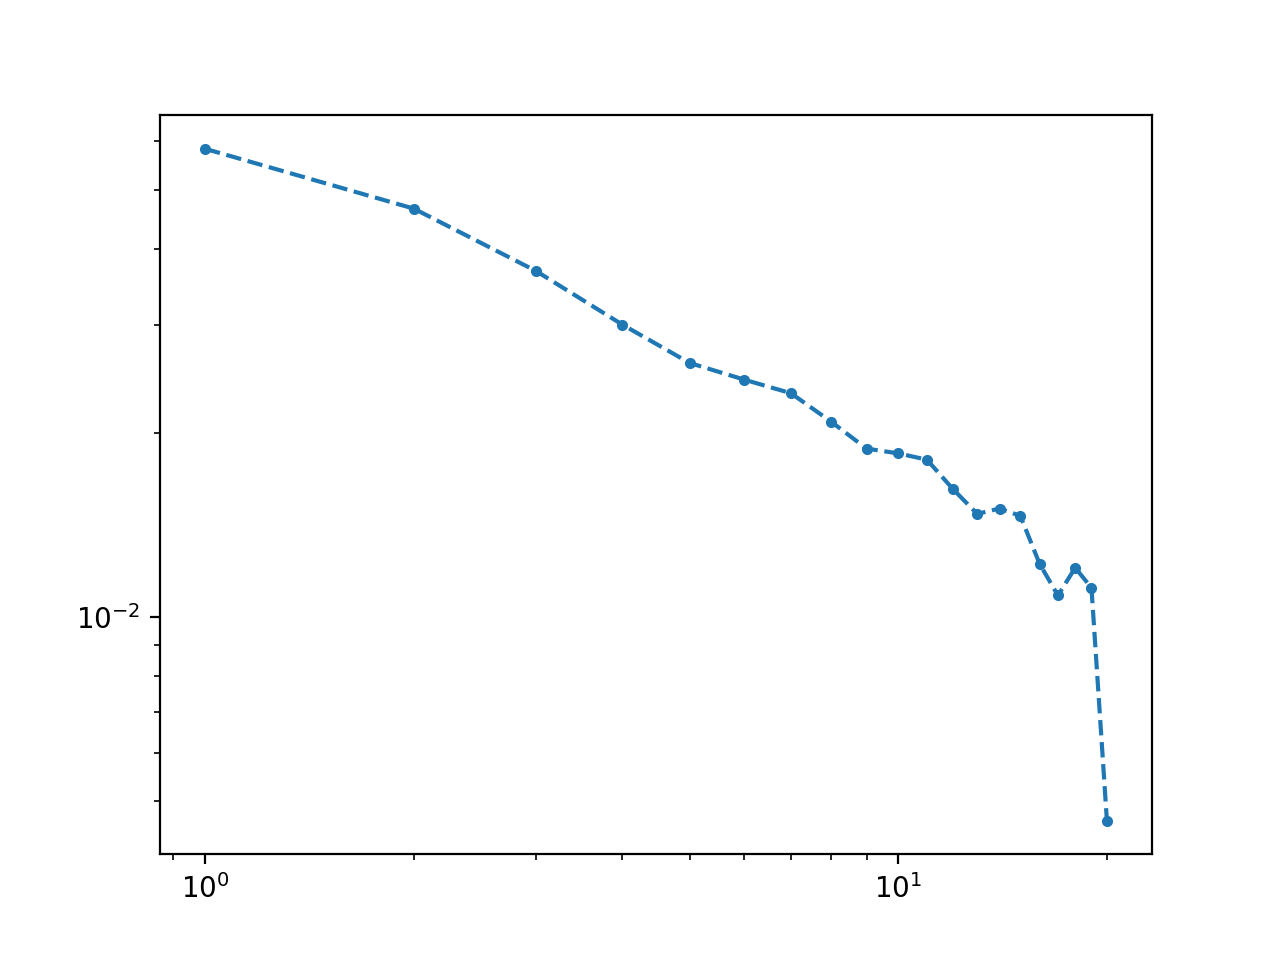

In [292]:
corr = [get(df10_10, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
%matplotlib notebook
plt.plot([i+1 for i in range(len(corr)-1)],
         np.array(corr).ravel()[1:], '.--')
plt.xscale('log')
plt.yscale('log')

In [241]:
corr = [get(df10_10, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
s = fourier(df10_10, ctr)
kx = [2*np.pi * n_kx / L for n_kx in s if n_kx >=0]
skx = [s[n_kx] for n_kx in s if n_kx >= 0]

<IPython.core.display.Javascript object>


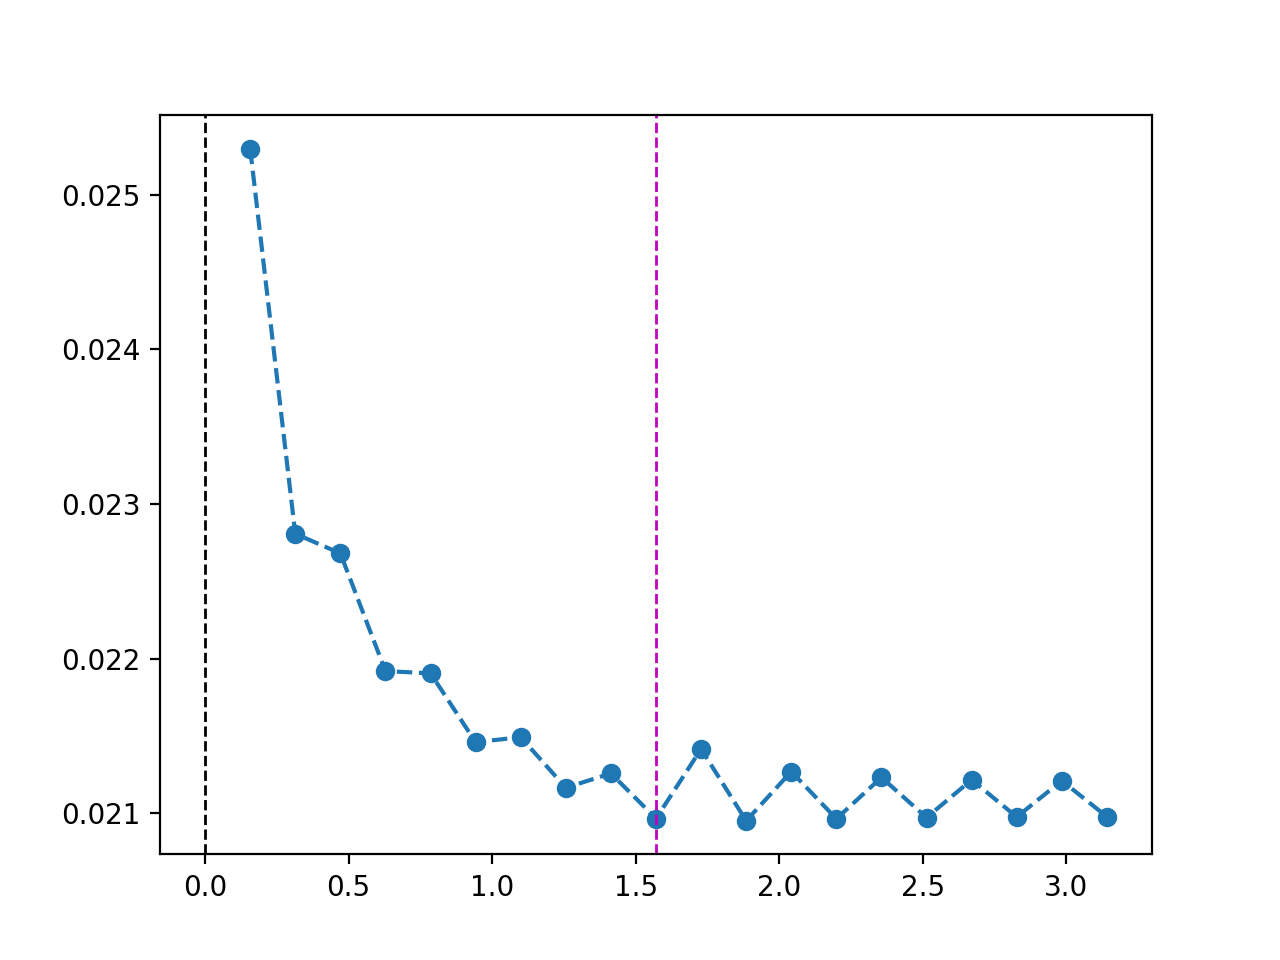

In [242]:
%matplotlib notebook

import matplotlib.pyplot as plt
plt.plot(kx[1:], skx[1:], 'o--')

Nup, Ndown = 10, 10
plt.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1)

# 2D Фурье BCS

<IPython.core.display.Javascript object>


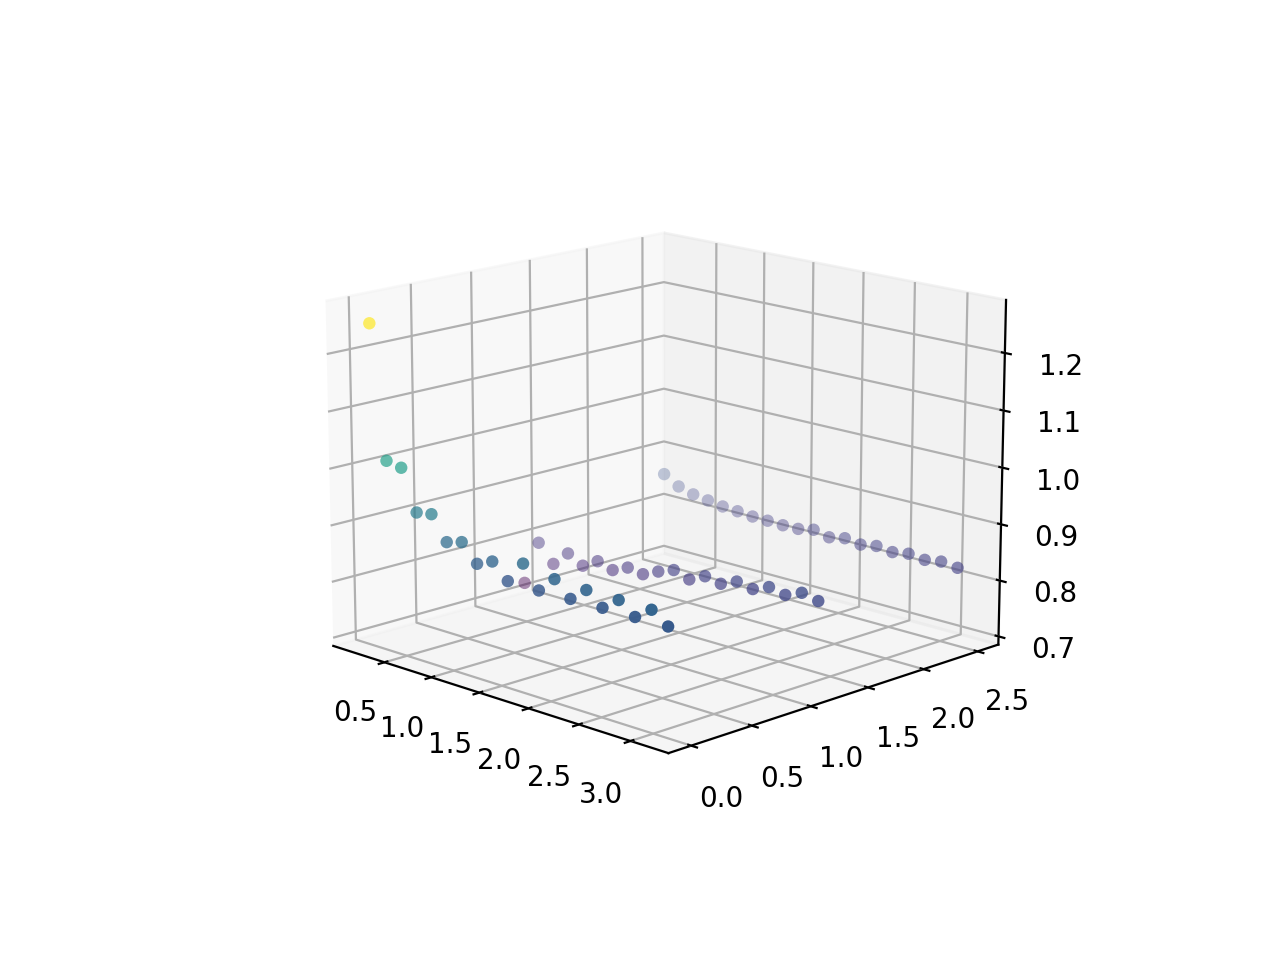

In [244]:
ss = fourier_2d(df10_10, ctr)
kx1 = [2*np.pi * i[0] / L for i in ss if (i[0] >= 0 and i[1] >= 0)]
ky1 = [2*np.pi * i[1] / W for i in ss if (i[0] >= 0 and i[1] >= 0)]
skxy = [ss[(i[0], i[1])] for i in ss if (i[0] >= 0 and i[1] >= 0)]

%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter(kx1[3:], ky1[3:], skxy[3:], c = skxy[3:], cmap='viridis', edgecolor='none', linewidth=0.5);

# W5 Nup = 17, Ndown = 3

In [323]:
df17_3 = file_to_pd('W5_40_17_3superconductive.txt')
W, L = 5, 40
ctr = W * (L//2) - W//2

<IPython.core.display.Javascript object>


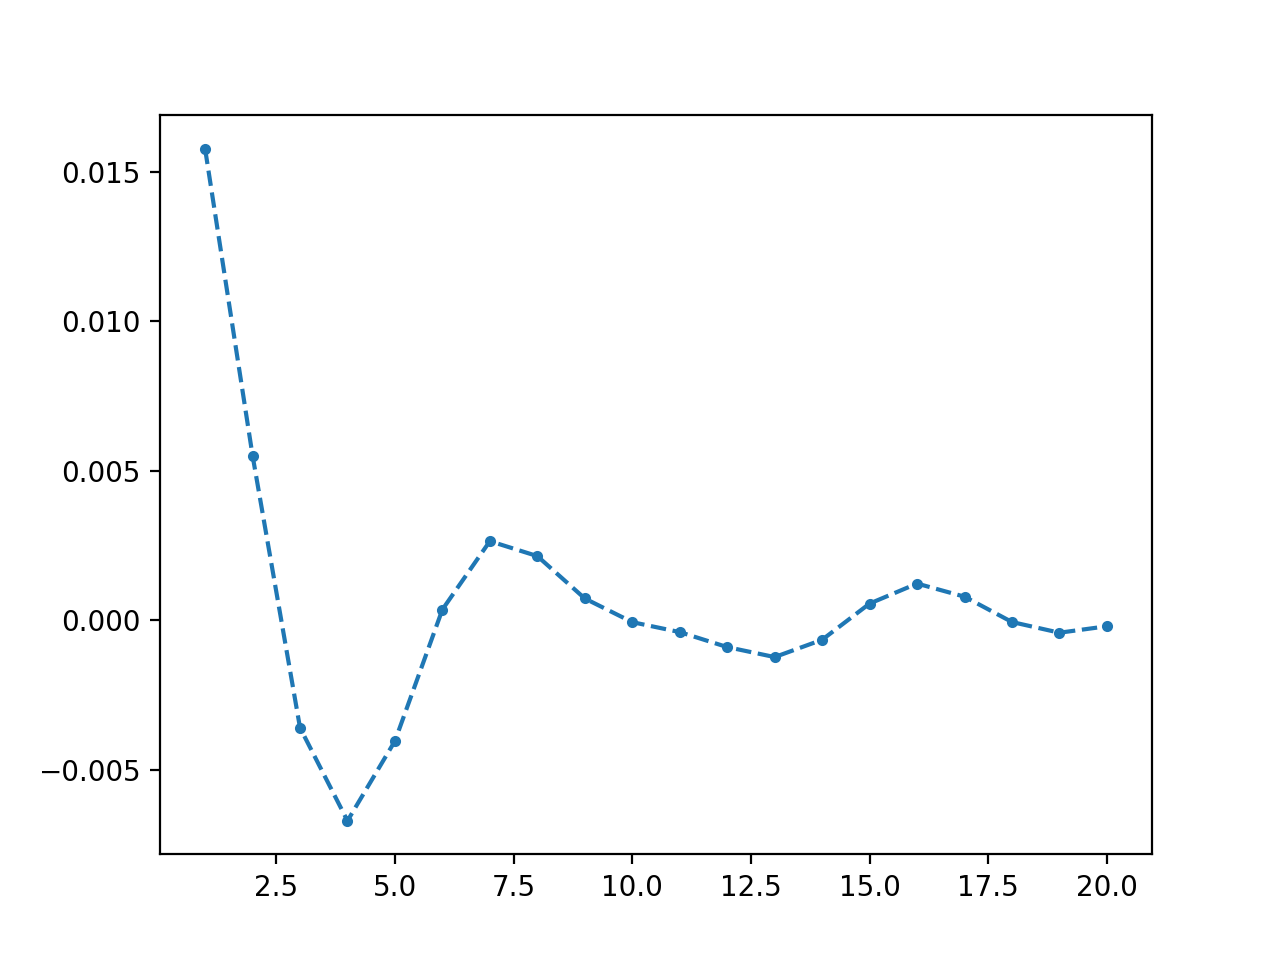

In [329]:
corr = [get(df17_3, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
%matplotlib notebook
plt.plot([i+1 for i in range(len(corr)-1)],
         np.array(corr).ravel()[1:], '.--')
# plt.xscale('log')
# plt.yscale('log')

In [330]:
corr = [get(df17_3, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
s = fourier(df17_3, ctr)
kx = [2*np.pi * n_kx / L for n_kx in s if n_kx >=0]
skx = [s[n_kx] for n_kx in s if n_kx >= 0]

<IPython.core.display.Javascript object>


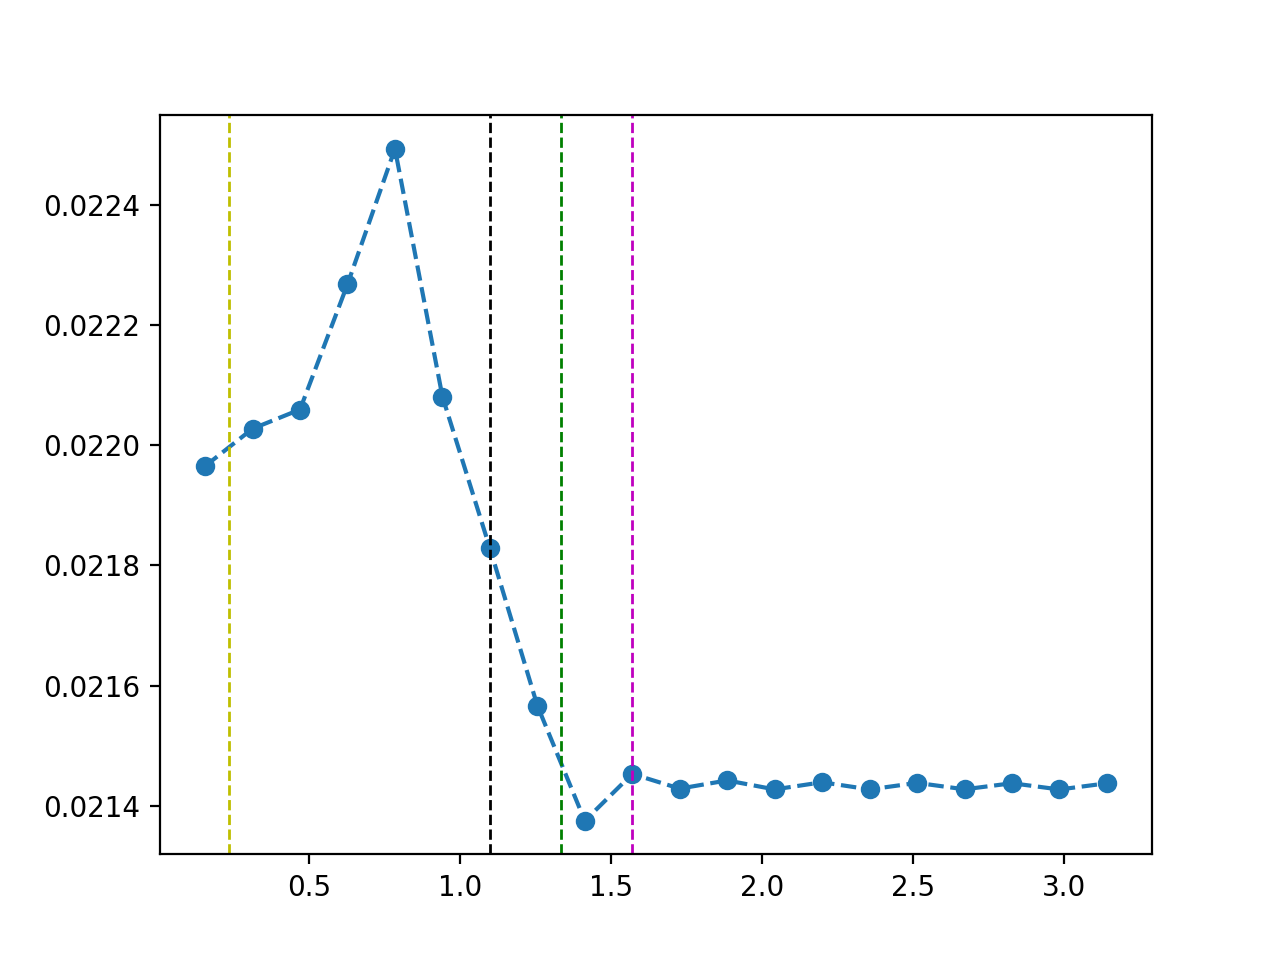

In [333]:
%matplotlib notebook

# import matplotlib.pyplot as plt
plt.plot(kx[1:], skx[1:], 'o--')

Nup, Ndown = 17, 3
plt.axvline(np.pi * (Nup)/L, ls='--', c='g', lw=1)
plt.axvline(np.pi * (Ndown)/L, ls='--', c='y', lw=1)
plt.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1)

<IPython.core.display.Javascript object>


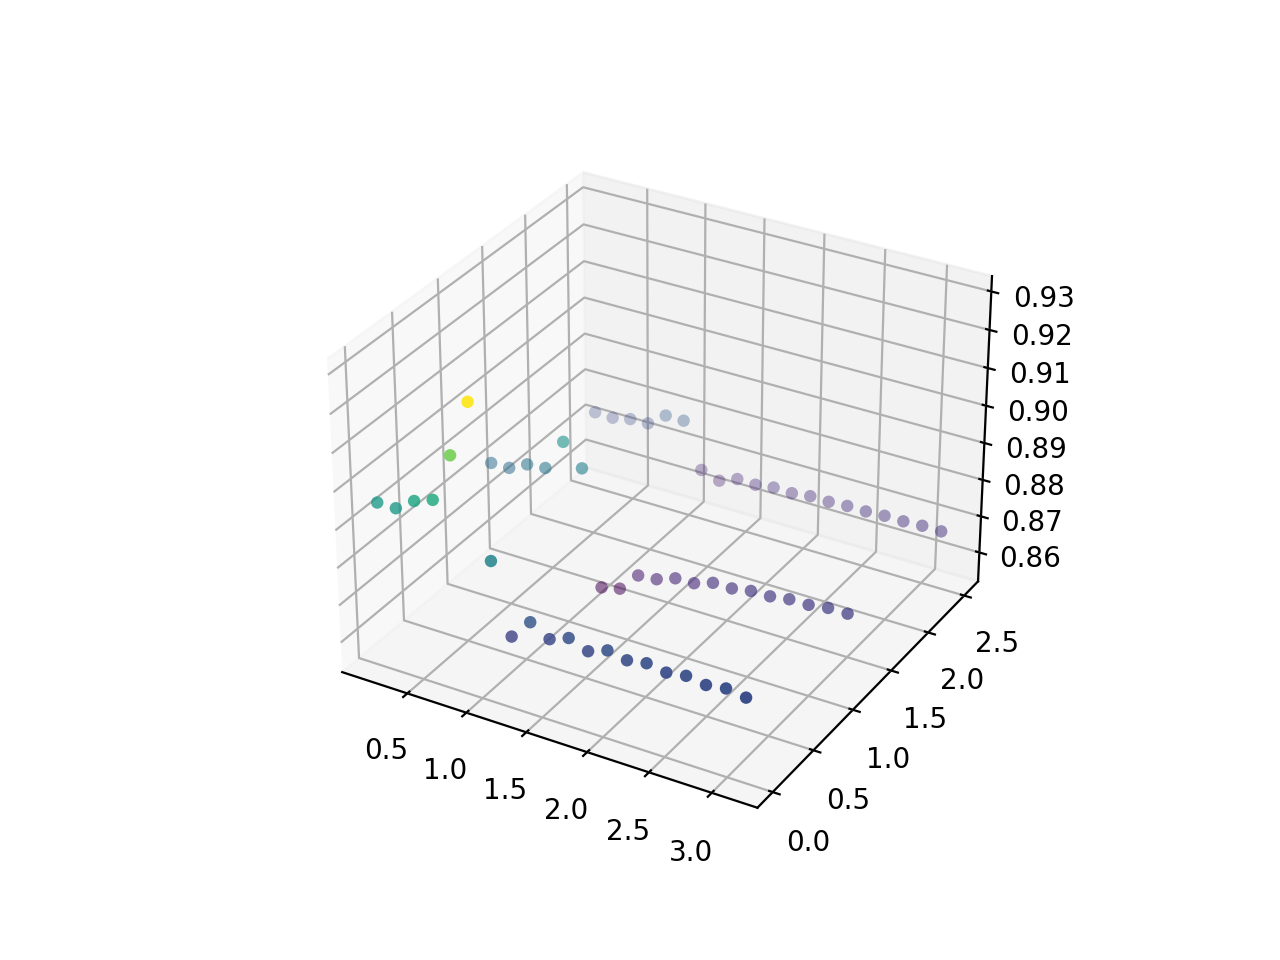

In [334]:
ss = fourier_2d(df19_1, ctr)
kx1 = [2*np.pi * i[0] / L for i in ss if (i[0] >= 0 and i[1] >= 0)]
ky1 = [2*np.pi * i[1] / W for i in ss if (i[0] >= 0 and i[1] >= 0)]
skxy = [ss[(i[0], i[1])] for i in ss if (i[0] >= 0 and i[1] >= 0)]

%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter(kx1[3:], ky1[3:], skxy[3:], c = skxy[3:], cmap='viridis', edgecolor='none', linewidth=0.5);